In [50]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm



In [51]:
data = pd.read_csv('men.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(14, 99)
['Unnamed: 0', 'year', 'date', 'all_2534', 'HS_2534', 'SC_2534', 'BAp_2534', 'BAo_2534', 'GD_2534', 'White_2534', 'Black_2534', 'Hisp_2534', 'NE_2534', 'MA_2534', 'Midwest_2534', 'South_2534', 'Mountain_2534', 'Pacific_2534', 'poor_2534', 'mid_2534', 'rich_2534', 'all_3544', 'HS_3544', 'SC_3544', 'BAp_3544', 'BAo_3544', 'GD_3544', 'White_3544', 'Black_3544', 'Hisp_3544', 'NE_3544', 'MA_3544', 'Midwest_3544', 'South_3544', 'Mountain_3544', 'Pacific_3544', 'poor_3544', 'mid_3544', 'rich_3544', 'all_4554', 'HS_4554', 'SC_4554', 'BAp_4554', 'BAo_4554', 'GD_4554', 'White_4554', 'Black_4554', 'Hisp_4554', 'NE_4554', 'MA_4554', 'Midwest_4554', 'South_4554', 'Mountain_4554', 'Pacific_4554', 'poor_4554', 'mid_4554', 'rich_4554', 'work_2534', 'nowork_2534', 'work_HS_2534', 'work_SC_2534', 'work_BAp_2534', 'work_BAo_2534', 'work_GD_2534', 'nowork_HS_2534', 'nowork_SC_2534', 'nowork_BAp_2534', 'nowork_BAo_2534', 'nowork_GD_2534', 'work_White_2534', 'work_Black_2534', 'work_Hisp_2534', 'no

In [52]:
data.head()

,Unnamed: 0,year,date,all_2534,HS_2534,SC_2534,BAp_2534,BAo_2534,GD_2534,White_2534,...,kids_SC_2534,kids_BAp_2534,kids_BAo_2534,kids_GD_2534,nokids_poor_2534,nokids_mid_2534,nokids_rich_2534,kids_poor_2534,kids_mid_2534,kids_rich_2534
3,4,1990,1990-01-01,0.349195,0.339468,0.332920,0.390247,0.403327,0.353039,0.321448,...,0.017415,0.006963,0.007949,0.004377,0.675805,0.534999,0.535761,0.069201,0.015200,0.008946
4,5,2000,2000-01-01,0.391913,0.379713,0.377861,0.429048,0.443400,0.388785,0.369256,...,0.047298,0.019472,0.021759,0.013286,0.722435,0.586713,0.486690,0.142260,0.041290,0.020636
5,6,2001,2001-01-01,0.399740,0.393164,0.385154,0.425514,0.442640,0.378938,0.375996,...,0.046411,0.019474,0.021640,0.013765,0.735369,0.609036,0.510359,0.137530,0.042096,0.024351
6,7,2002,2002-01-01,0.396965,0.395470,0.381424,0.415281,0.429555,0.376287,0.372149,...,0.050527,0.016132,0.018990,0.008632,0.735447,0.608335,0.511556,0.147035,0.040653,0.019093
7,8,2003,2003-01-01,0.407330,0.403300,0.394663,0.426582,0.447879,0.366577,0.380288,...,0.056097,0.022490,0.026193,0.013380,0.749087,0.618096,0.511295,0.144776,0.049622,0.020296


In [53]:
for item in data:
    print(item)

Unnamed: 0
year
date
all_2534
HS_2534
SC_2534
BAp_2534
BAo_2534
GD_2534
White_2534
Black_2534
Hisp_2534
NE_2534
MA_2534
Midwest_2534
South_2534
Mountain_2534
Pacific_2534
poor_2534
mid_2534
rich_2534
all_3544
HS_3544
SC_3544
BAp_3544
BAo_3544
GD_3544
White_3544
Black_3544
Hisp_3544
NE_3544
MA_3544
Midwest_3544
South_3544
Mountain_3544
Pacific_3544
poor_3544
mid_3544
rich_3544
all_4554
HS_4554
SC_4554
BAp_4554
BAo_4554
GD_4554
White_4554
Black_4554
Hisp_4554
NE_4554
MA_4554
Midwest_4554
South_4554
Mountain_4554
Pacific_4554
poor_4554
mid_4554
rich_4554
work_2534
nowork_2534
work_HS_2534
work_SC_2534
work_BAp_2534
work_BAo_2534
work_GD_2534
nowork_HS_2534
nowork_SC_2534
nowork_BAp_2534
nowork_BAo_2534
nowork_GD_2534
work_White_2534
work_Black_2534
work_Hisp_2534
nowork_White_2534
nowork_Black_2534
nowork_Hisp_2534
work_poor_2534
work_mid_2534
work_rich_2534
nowork_poor_2534
nowork_mid_2534
nowork_rich_2534
nokids_all_2534
kids_all_2534
nokids_HS_2534
nokids_SC_2534
nokids_BAp_2534
nokids

In [54]:
for item in data['all_2534']:
    print(item)

0.349194961953478
0.39191301651415705
0.39974017754254704
0.39696468523819606
0.40732974567179503
0.41066667429792203
0.42320717117543294
0.46553759863930394
0.477148871735213
0.491055796746086
0.514548589043268
0.523711211632477
0.5363615843348121
0.547199094964026


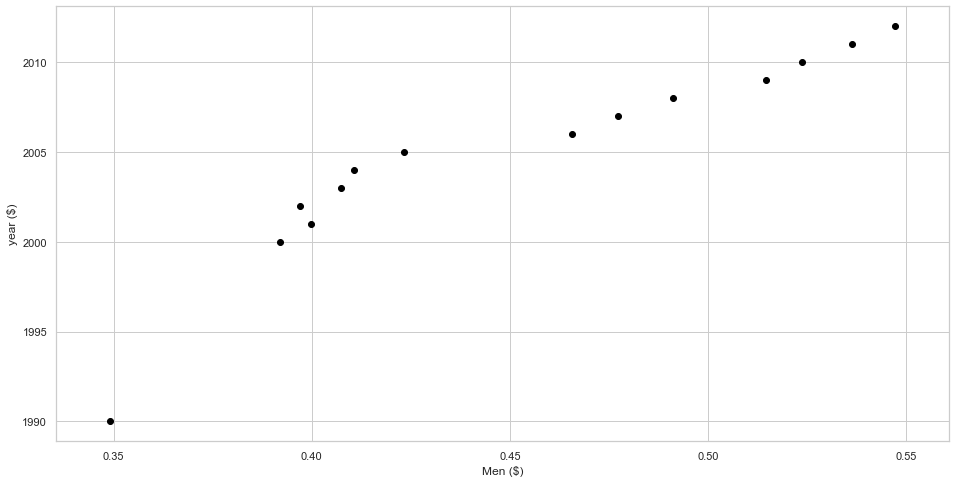

In [55]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['all_2534'],
    data['year'],
    c='black'
)
plt.xlabel("Men ($)")
plt.ylabel("year ($)")
plt.show()

In [56]:
dat = data['all_2534'].mean()
print(dat)

0.45246994139205104


In [57]:
data.groupby('year').mean()

,Unnamed: 0,all_2534,HS_2534,SC_2534,BAp_2534,BAo_2534,GD_2534,White_2534,Black_2534,Hisp_2534,...,kids_SC_2534,kids_BAp_2534,kids_BAo_2534,kids_GD_2534,nokids_poor_2534,nokids_mid_2534,nokids_rich_2534,kids_poor_2534,kids_mid_2534,kids_rich_2534
year,,,,,,,,,,,,,,,,,,,,,
1990,4,0.349195,0.339468,0.332920,0.390247,0.403327,0.353039,0.321448,0.506136,0.346432,...,0.017415,0.006963,0.007949,0.004377,0.675805,0.534999,0.535761,0.069201,0.015200,0.008946
2000,5,0.391913,0.379713,0.377861,0.429048,0.443400,0.388785,0.369256,0.502687,0.365680,...,0.047298,0.019472,0.021759,0.013286,0.722435,0.586713,0.486690,0.142260,0.041290,0.020636
2001,6,0.399740,0.393164,0.385154,0.425514,0.442640,0.378938,0.375996,0.536854,0.379712,...,0.046411,0.019474,0.021640,0.013765,0.735369,0.609036,0.510359,0.137530,0.042096,0.024351
2002,7,0.396965,0.395470,0.381424,0.415281,0.429555,0.376287,0.372149,0.534876,0.379527,...,0.050527,0.016132,0.018990,0.008632,0.735447,0.608335,0.511556,0.147035,0.040653,0.019093
2003,8,0.407330,0.403300,0.394663,0.426582,0.447879,0.366577,0.380288,0.556734,0.386227,...,0.056097,0.022490,0.026193,0.013380,0.749087,0.618096,0.511295,0.144776,0.049622,0.020296
2004,9,0.410667,0.411501,0.394203,0.426073,0.447595,0.368691,0.384354,0.566589,0.392210,...,0.051256,0.025622,0.029325,0.016853,0.738992,0.621681,0.519877,0.156383,0.050979,0.024793
2005,10,0.423207,0.430146,0.408744,0.427056,0.450247,0.363342,0.398222,0.566881,0.403624,...,0.057540,0.021582,0.024958,0.013313,0.750874,0.629657,0.531520,0.174230,0.057616,0.021771
2006,11,0.465538,0.481784,0.443698,0.459119,0.479152,0.403085,0.434209,0.626639,0.448674,...,0.063589,0.026651,0.030398,0.017103,0.757397,0.642783,0.613883,0.188768,0.060444,0.023535
2007,12,0.477149,0.494052,0.461620,0.463118,0.487878,0.394980,0.446229,0.641037,0.456701,...,0.073228,0.027146,0.031718,0.016228,0.775867,0.652341,0.624518,0.191429,0.061156,0.030958


In [58]:
X = data['year'].values.reshape(-1,1)
y = data['all_2534'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

0.010270286010135295
-20.137986325213486
The linear model is: Y = -20.138 + 0.01027X


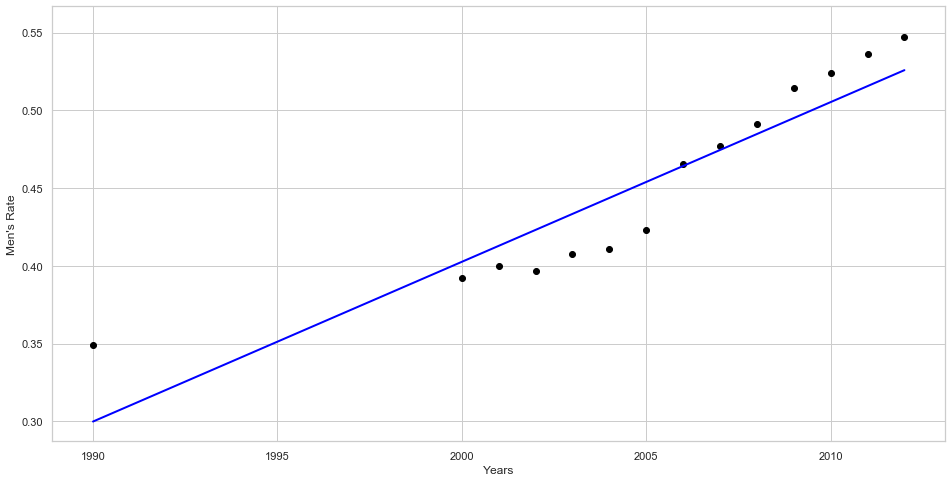

In [60]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['year'],
    data['all_2534'],
    c='black'
)
plt.plot(
    data['year'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Years")
plt.ylabel("Men's Rate")
plt.show()

In [69]:
X = dataset['year'].values.reshape(-1,1)
y = dataset['all_2534'].values.reshape(-1,1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
print(regressor.intercept_)
print(regressor.coef_)

[-14.77415699]
[[0.00759963]]


In [73]:
y_pred = regressor.predict(X_test)


In [74]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.155409,0.197111
1,0.396965,0.440299
2,0.410667,0.455498
3,0.423207,0.463098


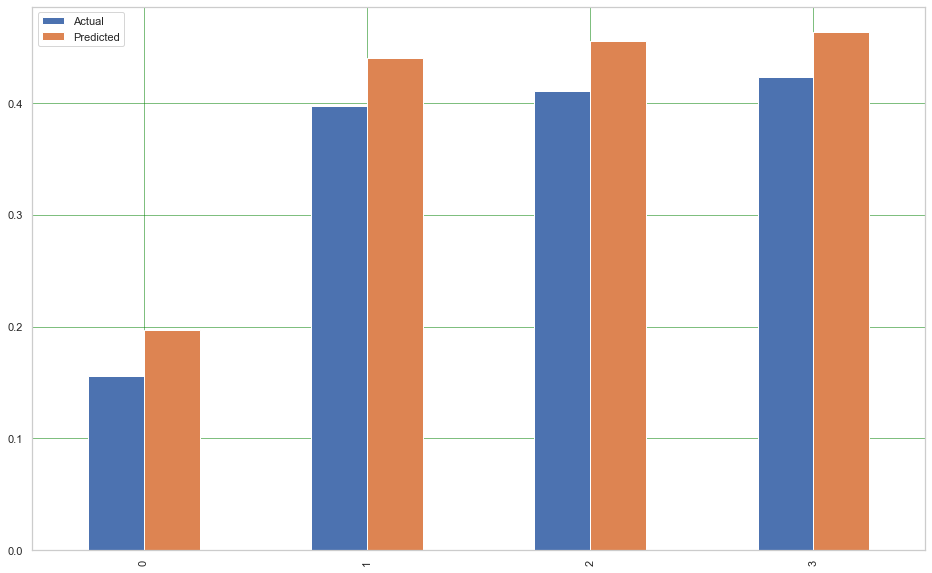

In [75]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

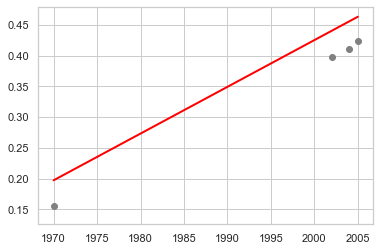

In [76]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [78]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.042439431100823904
Mean Squared Error: 0.001804496193207555
Root Mean Squared Error: 0.042479361967990466
